In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

In [3]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

In [4]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
ratings.shape

(100000, 4)

In [6]:
ratings.movie_id.nunique()

1682

In [7]:
ratings.loc[ratings.movie_id == 1, :].head()

,user_id,movie_id,rating,unix_timestamp
24,308,1,4,887736532
454,287,1,5,875334088
957,148,1,4,877019411
971,280,1,4,891700426
1324,66,1,3,883601324


In [8]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')
display(movies.shape)
display(movies.movie_id.nunique())

(1682, 5)

1682

In [9]:
movies.loc[movies.movie_id == 1, :].head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...


In [10]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
movie_ratings.shape

(100000, 8)

In [11]:
movie_ratings.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324


In [12]:
lens = pd.merge(movie_ratings, users)

In [15]:
# group by title and get each group's total count
lens.groupby('title').size()

title
'Til There Was You (1997)                                     9
1-900 (1994)                                                  5
101 Dalmatians (1996)                                       109
12 Angry Men (1957)                                         125
187 (1997)                                                   41
2 Days in the Valley (1996)                                  93
20,000 Leagues Under the Sea (1954)                          72
2001: A Space Odyssey (1968)                                259
3 Ninjas: High Noon At Mega Mountain (1998)                   5
39 Steps, The (1935)                                         59
8 1/2 (1963)                                                 38
8 Heads in a Duffel Bag (1997)                                4
8 Seconds (1994)                                              4
A Chef in Love (1996)                                         8
Above the Rim (1994)                                          5
Absolute Power (1997)             

In [14]:
# get the top 25 most rated movies  
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
display(most_rated)

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [16]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [21]:
# Which movies are most highly rated?
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.tail()

rating          
                                        size      mean
title                                                 
Young Guns II (1990)                      44  2.772727
Young Poisoner's Handbook, The (1995)     41  3.341463
Zeus and Roxanne (1997)                    6  2.166667
unknown                                    9  3.444444
Á köldum klaka (Cold Fever) (1994)         1  3.000000

In [20]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [22]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [23]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [26]:
display(most_50)

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
174    420
127    413
56     394
7      392
98     390
237    384
117    378
172    367
222    365
313    350
204    350
405    344
79     336
210    331
151    326
173    324
69     321
168    316
748    316
269    315
257    303
195    301
423    300
9      299
318    298
276    298
302    297
22     297
96     295
328    295
25     293
15     293
118    293
183    291
216    290
176    284
64     283
234    280
202    280
28     276
dtype: int64

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

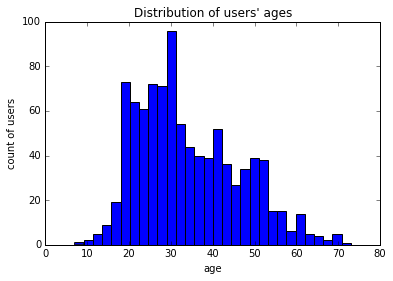

In [31]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [35]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [36]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# right = True, meaning include the most right value; false, meaning exclude it 
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)

In [37]:
# default drop_duplicates() used when both columns are duplicated
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [38]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [39]:
lens.set_index('movie_id', inplace=True)

### for most reviewed 50 movies, group them by title then by age_group

In [40]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [42]:
by_age.rating.mean()

title                                         age_group
Air Force One (1997)                          10-19        3.647059
                                              20-29        3.666667
                                              30-39        3.570000
                                              40-49        3.555556
                                              50-59        3.750000
                                              60-69        3.666667
                                              70-79        3.666667
Alien (1979)                                  10-19        4.111111
                                              20-29        4.026087
                                              30-39        4.103448
                                              40-49        3.833333
                                              50-59        4.272727
                                              60-69        3.500000
                                              70-79        4

In [44]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [48]:
lens.reset_index('movie_id', inplace=True)

In [49]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [50]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102
